<a href="https://colab.research.google.com/github/CaptainJimbo/MyPortfolio/blob/main/DigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td align="left">
  <a target="_blank" href="https://dimitriskogias.wixsite.com/spacecowboy" style="text-decoration: none; display: flex; align-items: center; color: white; background-color: purple; padding: 10px; border-radius: 5px;">
      <img src="https://static.wikia.nocookie.net/bravestarr/images/6/6d/Lucas_Conway.png/revision/latest?cb=20211111224054" width="40px" height="40px" style="border-radius: 50%; margin-right: 10px;" />
      <span>Visit my Webpage</span>
    </a>
  </td>
</table>



<table align="left">
  <td align="left"><a target="_blank" href="https://github.com/CaptainJimbo/MyPortfolio/blob/main/DigitClassification.ipynb" style="text-decoration: none; display: flex; align-items: center; color: black; background-color: lightgray; padding: 10px; border-radius: 5px;">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  width="40px" height="40px" style="border-radius: 50%; margin-right: 10px;"   />View it on GitHub</a></td>
</table>


<h1 align='center'> <b>THE MNIST DATABASE <i>of handwritten digits</i> </b>
</h1>
<p align='center'>
    <b>Yann LeCun</b>, Courant Institute, NYU<br>
    <b>Corinna Cortes</b>, Google Labs, New York<br>
    <b>Christopher J.C. Burges</b>, Microsoft Research, Redmond<br>
</p>

<p>The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image. It is a good database for implementing Machine Learning and Neural Network methods while spending minimal efforts on preprocessing and formatting.
I will build models that once able to read the random handwrittten digits from images after they are trained from labeled images (supervised learning, neural networks, deep learning models) or groupify the handwritten digits in categories for self-labeling. This a computer vision problem. </p>
<p>METHODS IMPLEMENTED:
<ul>
    <li> Supervised Learning
    <ul>
        <li> Logistic Regression
        <li> K-Nearest Neighbours
        <li> Support Vector Machines
        <li> Decision Tree Classifier
    </ul>
    <li> Unsupervised Learning
    <ul>
        <li> KMeans
        <li> DBSCAN
        <li> t-SNE
        <li> Semisuprvised Learning
        <li> others
    </ul>
    <li> Neural Networks
    <ul>
        <li> Fully Connected Layer Model
        <li> Convolutional Neural Network Model
    </ul>
</ul>
<p>

<h2> Supervised Learning </h2>
<a id="LR"></a>  
<h4> Logistic Regression </h4>

In [3]:
# Dataset
from tensorflow.keras.datasets import mnist

# Important Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from tqdm import tqdm

# Machine Learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Neural Networks
import tensorflow as tf
# assert len(tf.config.list_physical_devices('GPU')) > 0

<a id='another_cell'></a>

In [ ]:
# Load the dataset. It is a tuple of two tuples with arrays, the images in array format.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

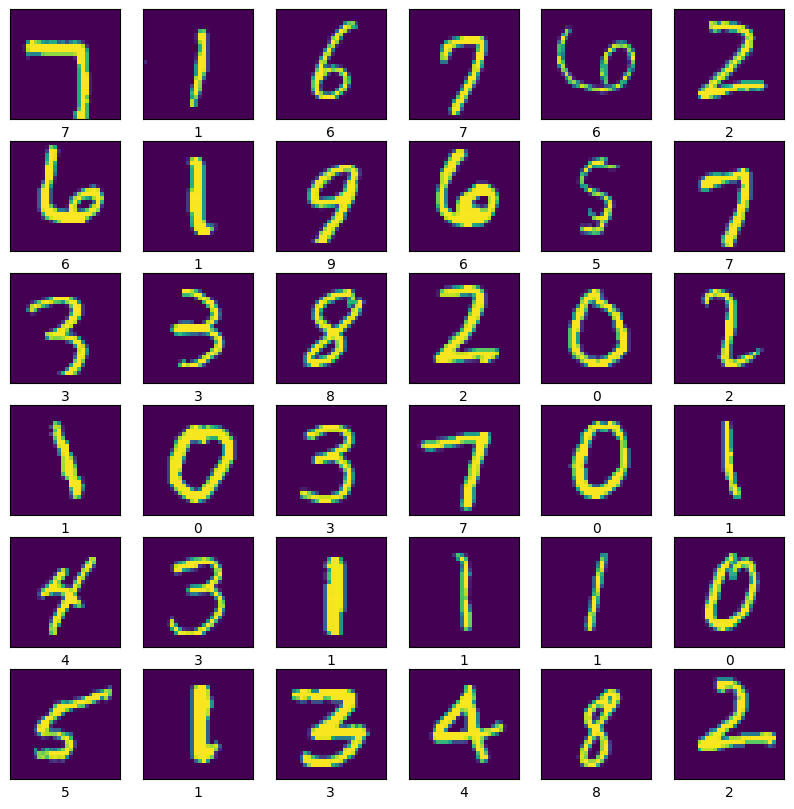

In [34]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(train_images[image_ind])#, cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

<h2> Machine Learning models

In [35]:
models = {'Logistic Regression':LogisticRegression(max_iter=10000),
          'K Nearest Neighbours':KNeighborsClassifier(),
          'Support Vector Machines':SVC(),
          'Decision Tree':DecisionTreeClassifier()
             }
scores = ['accuracy']#'balanced accuracy','f1']
results = pd.DataFrame(columns=list(models.keys()),index=scores)

In [37]:
N = 6000
n = 600
for model_name in tqdm(models):
    model = models[model_name]
    model.fit(train_images[:N].reshape(-1,28*28)/255, train_labels[:N])
    predictions = model.predict(test_images[:n].reshape(-1,28*28)/255)
    results.loc['accuracy',model_name] = accuracy_score(test_labels[:n],predictions)
results.transpose()

100%|██████████| 4/4 [00:22<00:00,  5.69s/it]


,accuracy
Logistic Regression,0.89
K Nearest Neighbours,0.918333
Support Vector Machines,0.941667
Decision Tree,0.766667


<h2> Neural Networks </h2>

In [ ]:
# These commands are to make the inputs suitable for neural network models
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_labels = (test_labels).astype(np.int64)

# Or I can use array = array.reshape(-1, 28, 28, 1) / 255.0).astype(np.float32)

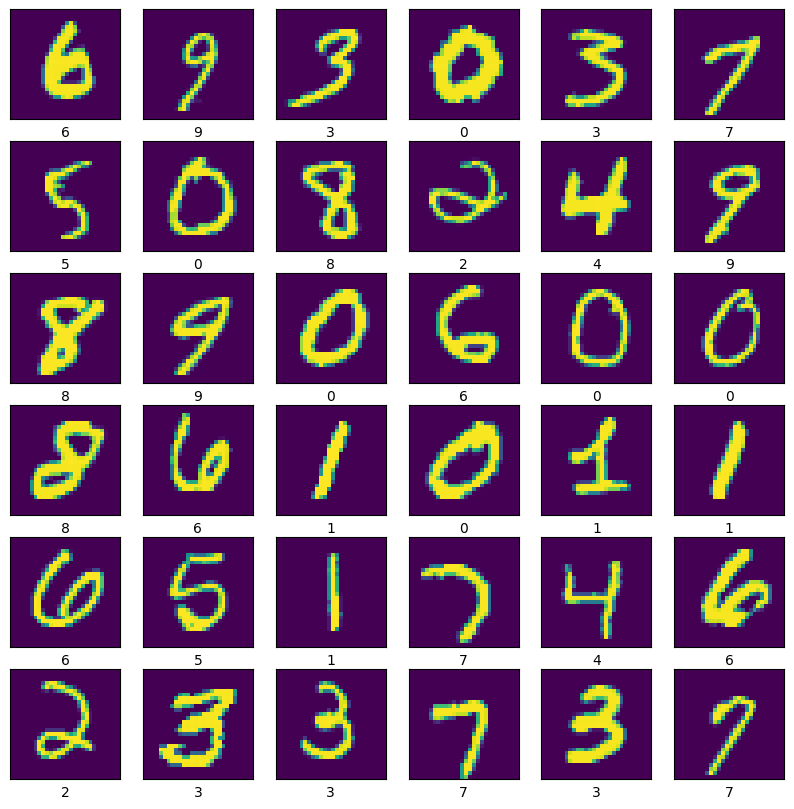

In [ ]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    # The command np.squeeze makes the array a 1-dimensional input suitable for plt.imshow()
    plt.imshow(np.squeeze(train_images[image_ind]))#, cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [ ]:
def fully_connected_model():
  fc_model = tf.keras.Sequential([
      # I flatten the input so that it can be fed into the model
      tf.keras.layers.Flatten(),

      # Activation function for the first fully connected (Dense) layer
      tf.keras.layers.Dense(128, activation= 'sigmoid'),

      # Second Dense layer that outputs the probability distribution across the 10 classes (0 to 9)
      tf.keras.layers.Dense(10, activation= 'softmax')

  ])
  return fc_model

model = fully_connected_model()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 10s 8ms/step - loss: 0.7086 - accuracy: 0.8287
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.3536 - accuracy: 0.9003
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.3077 - accuracy: 0.9117
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2822 - accuracy: 0.9188
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2619 - accuracy: 0.9250


In [ ]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2503 - accuracy: 0.9292
Test accuracy: 0.9291999936103821


In [ ]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        # TODO: Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu ),

        # TODO: Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        # TODO: Define the second convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu ),

        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # The last Dense layer to output the classification probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    return cnn_model

cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

1/1 [==============================] - 4s 4s/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 36)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 900)               0         
                                                                 
 den

In [ ]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), # Hanging indent style
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                  metrics=['accuracy'])

# I train the CNN model, with the same batch_size and number of epochs previously used
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 9s 5ms/step - loss: 0.1754 - accuracy: 0.9480
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0545 - accuracy: 0.9832
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0385 - accuracy: 0.9880
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0293 - accuracy: 0.9911
Epoch 5/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0231 - accuracy: 0.9926


In [ ]:
# I test the models accuracy with test data
test_loss, test_acc = cnn_model.evaluate(test_images,test_labels)

print('Test accuracy:', test_acc)
print('Much better that a standard fully connected layer')

313/313 [==============================] - 1s 3ms/step - loss: 0.0307 - accuracy: 0.9903
Test accuracy: 0.9902999997138977
Much better that a standard fully connected layer


In [ ]:
predictions = cnn_model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([9.3360953e-08, 6.5635660e-08, 8.2244263e-08, 6.8915955e-07,
       3.8459258e-09, 8.2331442e-10, 8.7096655e-13, 9.9999213e-01,
       7.4712165e-09, 6.8684312e-06], dtype=float32)

In [ ]:
prediction = np.argmax(predictions[0])
print(prediction)

7


Label of this digit is: 7


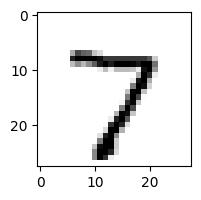

In [ ]:
print("Label of this digit is:", test_labels[0])
plt.figure(figsize=(2,2))
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)
plt.show()